In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.image as img
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets,transforms,models
import os
import pathlib
import warnings
warnings.filterwarnings('ignore')

## Enter path of directory where 

In [3]:
path=pathlib.Path(os.path.normpath('G:/Machine-Deep Learning Work/Project/1/'))

In [4]:
path

WindowsPath('G:/Machine-Deep Learning Work/Project/1')

In [42]:
model=models.resnet152(pretrained=True)
model.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [57]:
train_transforms = transforms.Compose([transforms.Resize((360,360)),
                                      transforms.ToTensor(),
                                       transforms.Normalize([0.485,0.456,0.406],
                                                     [0.229,0.224,0.225])
                                      ])
test_transforms = transforms.Compose([transforms.Resize((360,360)),
                                 transforms.ToTensor(),
                                     transforms.Normalize([0.485,0.456,0.406],
                                                     [0.229,0.224,0.225])])

In [58]:
def show(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    plt.imshow(image)


    return ax

In [32]:
trainlocation=path/'train'
testlocation=path/'valid'

In [71]:
train_dataset=datasets.ImageFolder(trainlocation,transform=train_transforms)
test_dataset=datasets.ImageFolder(testlocation,transform=test_transforms)

TypeError: can only concatenate str (not "WindowsPath") to str

In [60]:
dataloader=torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=True)


In [35]:
label=['Aniket','Dipali','Divyam','Priyanshi','Shruti']

Label Divyam


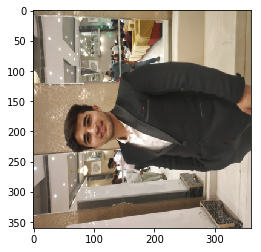

In [61]:
images, labels = next(iter(dataloader))
show(images[1])
print('Label {}'.format(label[labels[1]]))

Label Priyanshi


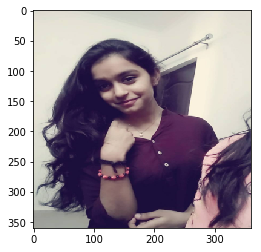

In [62]:
num=4
show(images[num])
print('Label {}'.format(label[labels[num]]))

In [63]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [64]:
from collections import OrderedDict
classifier=nn.Sequential(OrderedDict([
    ('fc1',nn.Linear(2048,1000)),
    ('relu1',nn.ReLU()),
    ('drop1',nn.Dropout(p=0.4)),
    ('fc2',nn.Linear(1000,256)),
    ('relu2',nn.ReLU()),
    ('drop2',nn.Dropout(p=0.4)),
    ('fc3',nn.Linear(256,128)),
    ('relu3',nn.ReLU()),
    ('drop3',nn.Dropout(p=0.4)),
    ('fc4',nn.Linear(128,5)),
    ('out',nn.LogSoftmax(dim=1))
]))
for param in model.parameters():
    param.requires_grad=False
model.fc=classifier
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [65]:
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.0001)

In [66]:
model.cuda()
epochs=50
for i in range(epochs+1):
    running_loss=0
    for images,labels in dataloader:
        model.train()
        optimizer.zero_grad()
        images,labels=images.cuda(),labels.cuda()
        output=model(images)
        loss=criterion(output,labels)
        running_loss+=loss.item()
        loss.backward()
        optimizer.step()
        
    else:
        if i%5==0:
            print("Loss at epoch {}: {:0.4f}".format(i,running_loss/16))

Loss at epoch 0: 0.5027
Loss at epoch 5: 0.4965
Loss at epoch 10: 0.4970
Loss at epoch 15: 0.4908
Loss at epoch 20: 0.4612
Loss at epoch 25: 0.4367
Loss at epoch 30: 0.4512
Loss at epoch 35: 0.4147
Loss at epoch 40: 0.3556
Loss at epoch 45: 0.3306
Loss at epoch 50: 0.3134


In [69]:
testloader=torch.utils.data.DataLoader(test_dataset,batch_size=28,shuffle=True)

In [70]:
model.eval()
imagestest=next(iter(testloader))
with torch.no_grad():
    log_ps=model(imagestest.cuda())
    ps=torch.exp(log_ps)
    
top_p,top_class=ps.topk(1,dim=1)

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\Machine-Deep Learning Work\\Project\\1\\valid\\Divyam\\IMG_20190420_183353_1562156591752.jpg'

In [55]:
correct=list()
for i in range(28):
    num=i
    img=imagestest[num]
    val=top_class[num].item()
    if val==labelstest[num].item():
        correct.append(num)

In [56]:
correct

[0, 1, 2, 3, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 25, 27]